<a href="https://colab.research.google.com/github/Kallukalluzzz/Mini-Project/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing packages
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv("/content/DGA dataset_new.csv")
data

,NM,H2,CH4,C2H6,C2H4,C2H2,Type
0,1,3930.0,2397.0,157.0,0.0,0.0,Partial discharge
1,2,37800.0,1740.0,249.0,8.0,8.0,Partial discharge
2,3,92600.0,10200.0,0.0,0.0,0.0,Partial discharge
3,4,8266.0,1061.0,22.0,0.0,0.0,Partial discharge
4,5,9340.0,995.0,60.0,6.0,7.0,Partial discharge
...,...,...,...,...,...,...,...
266,267,2443.0,3422.0,7852.0,3000.0,6394.0,No fault
267,268,4395.0,5201.0,6933.0,6788.0,2121.0,No fault
268,269,7613.0,1120.0,3363.0,4751.0,3393.0,No fault
269,270,2366.0,1031.0,5909.0,108.0,7025.0,No fault


In [6]:
X=data.drop(['Type', 'NM'],axis=1)
y=data['Type']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
y_train

22                        Spark discharge
244                              No fault
111           Low-temperature overheating
12                        Spark discharge
145           Low-temperature overheating
                      ...                
251                              No fault
192    Low/Middle-temperature overheating
117                     Partial discharge
47                          Arc discharge
172          High-temperature overheating
Name: Type, Length: 216, dtype: object

In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
classifier.score(X_test, y_test)

0.6727272727272727

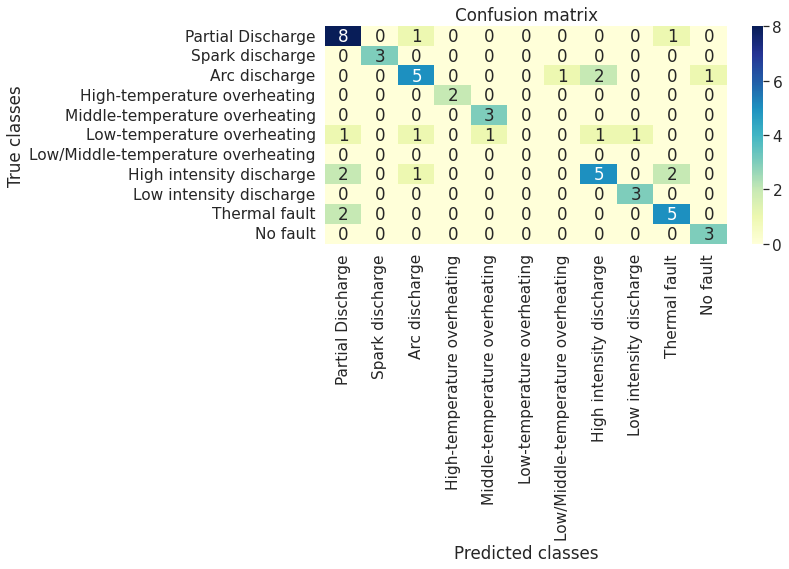

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#index = ['Normal','Inner Race (0.021")']  
#columns = ['Normal','Inner Race (0.021")']  
#cm_df = pd.DataFrame(cm,columns,index)  

target_names=('Partial Discharge', 'Spark discharge', 'Arc discharge',
       'High-temperature overheating', 'Middle-temperature overheating',
       'Low-temperature overheating',
       'Low/Middle-temperature overheating', 'High intensity discharge',
       'Low intensity discharge', 'Thermal fault', 'No fault')
plt.figure(figsize=(9,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, fmt='g',xticklabels=target_names,yticklabels=target_names,cmap="YlGnBu") # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

In [14]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

                                    precision    recall  f1-score   support

                     Arc discharge       0.62      0.80      0.70        10
          High intensity discharge       1.00      1.00      1.00         3
      High-temperature overheating       0.62      0.56      0.59         9
           Low intensity discharge       1.00      1.00      1.00         2
       Low-temperature overheating       0.75      1.00      0.86         3
Low/Middle-temperature overheating       0.00      0.00      0.00         5
    Middle-temperature overheating       0.00      0.00      0.00         0
                          No fault       0.62      0.50      0.56        10
                 Partial discharge       0.75      1.00      0.86         3
                   Spark discharge       0.62      0.71      0.67         7
                     Thermal fault       0.75      1.00      0.86         3

                          accuracy                           0.67        55
          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1